In [1]:
"""
 m examples consist of n=3 features
 each label will look like 1 * x_0 + 2 * x_1 + 3 * x_2 + noise
"""

import numpy as np

def generate_data(A, m, noise):
    n = len(A)
    X = np.random.normal(0, 1, (m, n))
    # print(X.shape)
    y = np.dot(X, A) + np.random.normal(0, noise, (m))
    # print(y.shape)
    return X, y

X_train, y_train = generate_data([1, 2, 3], 100000, 10.1)
print(X_train.shape, y_train.shape)
X_test, y_test = generate_data([1, 2, 3], 1000, 10.1)
print(X_test.shape, y_test.shape)

(100000, 3) (100000,)
(1000, 3) (1000,)


In [2]:
def solve_pseudo_inverse(X, y):
    print(np.linalg.pinv(np.c_[np.ones((X.shape[0], 1)), X]).dot(y))
    #print(np.dot(X.T, X).shape)
    #print(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T).shape)
    #print(np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y).shape)
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

solve_pseudo_inverse(X_train, y_train)

[-0.02004186  1.0231176   1.96129054  3.0356761 ]


array([1.02308683, 1.96130122, 3.03577953])

In [3]:
import sklearn
from sklearn.linear_model import LinearRegression

def solve_sklearn(X, y):
    model = LinearRegression()
    model.fit(X, y)
    print(model.coef_)

solve_sklearn(X_train, y_train)

[1.0231176  1.96129054 3.0356761 ]


In [4]:
def solve_sgd(X, y, iterations, learning_rate, eps):
    n = X.shape[1]
    a = np.zeros(n)
    for _ in range(iterations):
        t = np.dot(X, a)
        t = 2 * (t - y)
        t = (X.T * t).T
        #print(t.shape)
        t = np.mean(t, axis = 0)
        #print(t.shape)
        a -= t * learning_rate
        #print(t, a)
        if np.max(np.abs(t)) < eps:
            break
    return a

print(solve_sgd(X_train, y_train, 1000, 0.01, 1e-5))

[1.02308569 1.96129812 3.03577469]


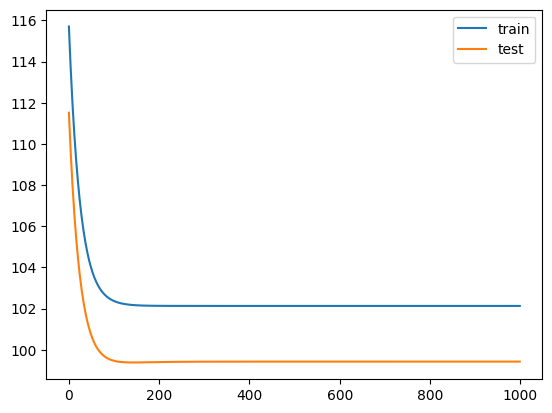

[1.02308683 1.96130122 3.03577952]


In [5]:
import matplotlib.pyplot as plt

def calculate_loss(a, X, y):
    t = np.dot(X, a) - y
    t *= t
    # print(t.shape)
    return np.mean(t)

def solve_sgd_and_plot(X_train, y_train, X_test, y_test, iterations, learning_rate):
    n = X_train.shape[1]
    a = np.zeros(n)
    train_losses, test_losses = [], []
    for _ in range(iterations):
        t = np.dot(X_train, a)
        t = 2 * (t - y_train)
        t = (X_train.T * t).T
        #print(t.shape)
        t = np.mean(t, axis = 0)
        #print(t.shape)
        a -= t * learning_rate
        #print(t, a)
        train_losses.append(calculate_loss(a, X_train, y_train))
        test_losses.append(calculate_loss(a, X_test, y_test))
    plt.plot(train_losses, label = "train")
    plt.plot(test_losses, label = "test")
    plt.legend()
    plt.show()
    return a

print(solve_sgd_and_plot(X_train, y_train, X_test, y_test, 1000, 0.01))

In [6]:
import catboost

def solve_catboost(X, y, iterations, learning_rate, depth):
    model = catboost.CatBoostRegressor(iterations = iterations, learning_rate = learning_rate, depth = depth)
    model.fit(X, y, verbose = False)
    return model

model = solve_catboost(X_train, y_train, 1000, 0.1, 6)

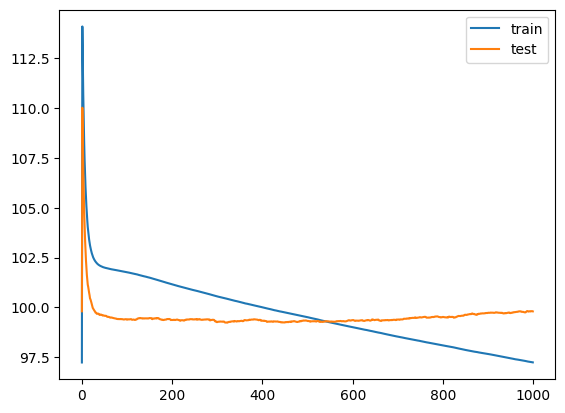

In [7]:
def plot_catboost(X_train, y_train, X_test, y_test, model):
    m = model.tree_count_
    train_losses, test_losses = [], []
    for k in range(m):
        t = model.predict(X_train, ntree_end = k)
        t = t - y_train
        t *= t
        train_losses.append(np.mean(t))
        t = model.predict(X_test, ntree_end = k)
        t = t - y_test
        t *= t
        test_losses.append(np.mean(t))
    plt.plot(train_losses, label = "train")
    plt.plot(test_losses, label = "test")
    plt.legend()
    plt.show()

plot_catboost(X_train, y_train, X_test, y_test, model)